In [1]:
import pandas as pd

final_df = pd.read_csv("final_cleaned_reviews.csv")


In [2]:
final_df.shape


(3498, 13)

In [3]:
final_df.head()


,reviewer_name,review_title,review_place,up_votes,down_votes,review_date,review_text,rating,product_category,clean_review,clean_word_length,sentiment,word_length
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4.0,Sports,nice product good quality price rising bad sig...,18,Positive,37
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1.0,Sports,supplied yonex mavis outside cover yonex insid...,10,Negative,20
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1.0,Sports,worst product damaged shuttlecock packed new b...,16,Negative,24
3,ASHIK P A,Over priced,Unknown,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1.0,Sports,pricedjust retailer understand wat advantage b...,9,Negative,17
4,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5.0,Sports,good quality product delivered time,5,Positive,7


In [4]:
final_df.columns


Index(['reviewer_name', 'review_title', 'review_place', 'up_votes',
       'down_votes', 'review_date', 'review_text', 'rating',
       'product_category', 'clean_review', 'clean_word_length', 'sentiment',
       'word_length'],
      dtype='object')

In [5]:
final_df.isnull().sum()

reviewer_name        0
review_title         2
review_place         0
up_votes             0
down_votes           0
review_date          0
review_text          0
rating               0
product_category     0
clean_review         0
clean_word_length    0
sentiment            0
word_length          0
dtype: int64

In [6]:
final_df["sentiment_label"] = final_df["sentiment"].map({
    "Positive": 1,
    "Negative": 0
})


In [7]:
final_df[["sentiment", "sentiment_label"]].head()


,sentiment,sentiment_label
0,Positive,1
1,Negative,0
2,Negative,0
3,Negative,0
4,Positive,1


In [8]:
X = final_df["clean_review"]
y = final_df["sentiment_label"]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1, 2),min_df=5)


In [34]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [37]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18788 stored elements and shape (2798, 783)>

In [38]:
X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4654 stored elements and shape (700, 783)>

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
from sklearn.metrics import classification_report, f1_score

y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression F1 Score:",f1_score(y_test, y_pred_lr))

print(classification_report(y_test, y_pred_lr))


Logistic Regression F1 Score: 0.9403862300587741
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       128
           1       0.90      0.98      0.94       572

    accuracy                           0.90       700
   macro avg       0.88      0.76      0.80       700
weighted avg       0.90      0.90      0.89       700



In [14]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [15]:
y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM F1 Score:",f1_score(y_test, y_pred_svm))


SVM F1 Score: 0.9449225473321858


In [39]:
y_pred_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [16]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [17]:
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes F1 Score:",f1_score(y_test, y_pred_nb))


Naive Bayes F1 Score: 0.9475465313028765


In [18]:
model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Naive Bayes"],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_nb)]
})

model_results


,Model,F1 Score
0,Logistic Regression,0.940386
1,SVM,0.944923
2,Naive Bayes,0.947547


In [23]:
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb))


Naive Bayes F1 Score: 0.9475465313028765


In [22]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72       128
           1       0.92      0.98      0.95       572

    accuracy                           0.91       700
   macro avg       0.89      0.79      0.83       700
weighted avg       0.91      0.91      0.91       700



In [24]:
## Error Analysis (False Positives & False Negatives)
y_pred = nb_model.predict(X_test_tfidf)


In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

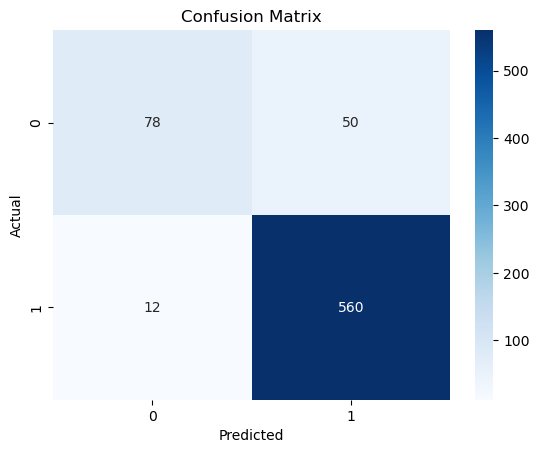

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
false_positives = X_test[(y_test == 0) & (y_pred == 1)]

false_positives.sample(5)


1568                                    badd quality last
718             waste product suggest people bay flipkart
2933    wrost duplicate productdon buy seller productf...
1268    purchasing shuttle flipkart long time quality ...
1101    shuttle ordered tag fine weight quality worse ...
Name: clean_review, dtype: object

In [28]:
false_negatives = X_test[(y_test == 1) & (y_pred == 0)]

false_negatives.sample(5)


2667      full bawkbass waste money cant use playing hour
107                                low quality durabality
2722                      shuttle broken within day usage
1305                             bad product quality good
1255    good quality play hour vigoursly daily shuttle...
Name: clean_review, dtype: object

### Error Analysis Observations

- Some negative reviews were misclassified as positive due to mixed sentiment.
- Sarcastic reviews confused the model.
- Very short or ambiguous reviews caused misclassification.
- Traditional ML models lack contextual understanding.


In [19]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("sentiment_nb_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)


In [29]:
sample_reviews = [
    "very bad quality not worth money",
    "excellent product value for money",
    "average quality but price is high"]

sample_vec = tfidf.transform(sample_reviews)
preds = nb_model.predict(sample_vec)

for review, pred in zip(sample_reviews, preds):
    print(review, "→", "Positive" if pred == 1 else "Negative")


very bad quality not worth money → Negative
excellent product value for money → Positive
average quality but price is high → Positive
